In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline 

### Loading Data 

In [3]:
df_dv=pd.read_csv('/Users/dasha/Documents/Capstone_2_files/Data Cleaning/Clean Data Frame.csv')
df_dv.head()

,Title,Achievement/Effort_Importance,Active Learning_Importance,Active Listening_Importance,Adaptability/Flexibility_Importance,Administration and Management_Importance,Analytical Thinking_Importance,Analyzing Data or Information_Importance,Arm-Hand Steadiness_Importance,Artistic_Occupational Interests,...,Work Schedules_Context_3.0,Work With Work Group or Team_Context_1.0,Work With Work Group or Team_Context_2.0,Work With Work Group or Team_Context_3.0,Work With Work Group or Team_Context_4.0,Work With Work Group or Team_Context_5.0,Wrist-Finger Speed_Importance,Writing_Importance,Written Comprehension_Importance,Written Expression_Importance
0,Accountants,3.63,3.12,3.88,3.78,3.11,4.21,3.93,1.38,1.00,...,0.00,16.3,17.37,6.01,4.52,55.81,1.38,3.62,4.00,3.75
1,Actors,4.73,2.62,3.75,4.78,2.56,3.25,1.78,2.00,6.67,...,15.36,0.0,0.00,0.00,0.00,100.00,1.12,2.88,3.88,2.88
2,Actuaries,4.44,3.38,4.00,3.81,3.31,4.81,4.88,1.12,1.67,...,0.00,0.0,6.45,19.35,45.16,29.03,1.25,3.38,4.00,3.75
3,Acupuncturists,3.65,3.12,3.75,3.81,2.67,3.95,3.06,3.12,2.33,...,0.00,13.6,3.14,29.95,20.79,32.53,1.38,3.25,3.50,3.25
4,Acute Care Nurses,4.25,3.75,4.00,4.71,2.89,4.11,3.48,1.75,2.00,...,0.00,0.0,0.00,3.85,15.38,80.77,1.38,3.50,4.00,3.75


In [4]:
# Check to see if null values are present
assert df_dv.notnull().all().all()

### Scaling data 

In [5]:
array=df_dv.drop(columns='Title').values
st_sc=StandardScaler() 
st_sc_array=st_sc.fit_transform(array)

### Dimensionality Reduction 

Number of components:  466
Number of variable explaining at least 80% of variance:  76


Text(0,0.5,'Cumilative sum of variance')

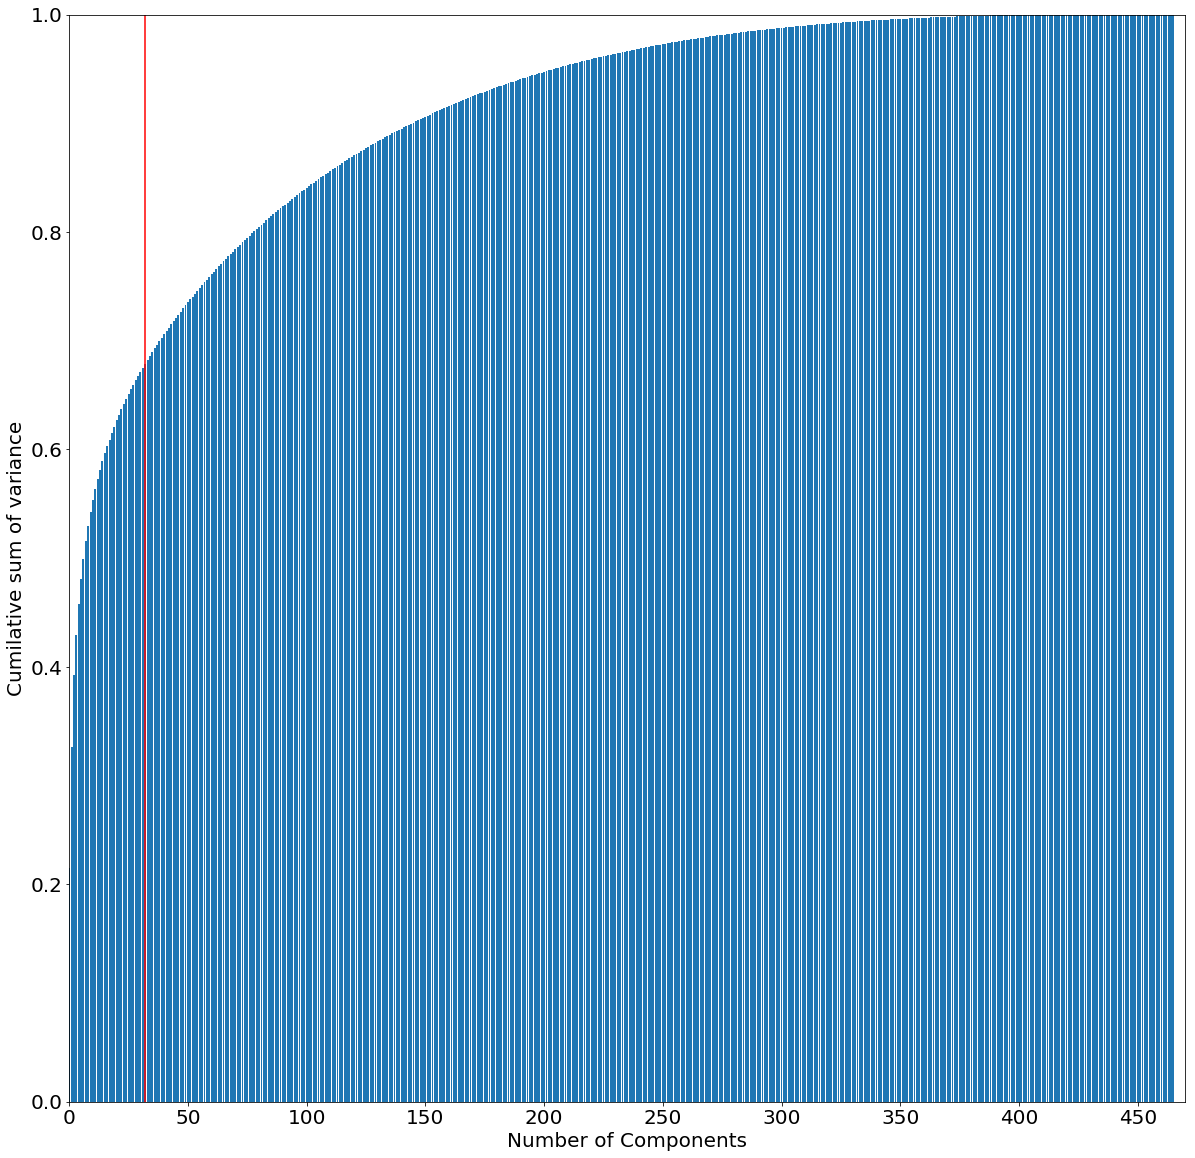

In [6]:
pca=PCA()
model_p=pca.fit(st_sc_array)
n=np.arange(model_p.n_components_)
print('Number of components: ',len(n))
exp_var=model_p.explained_variance_ratio_.cumsum()
exp_var=[round(x,2)for x in exp_var]
print('Number of variable explaining at least 80% of variance: ',exp_var.index(.8)) 
plt.figure(figsize=(20,20))
plt.bar(n,model_p.explained_variance_ratio_.cumsum())
plt.xlim(0,470)
plt.ylim(0,1)
plt.xticks(np.arange(0,470,step=50),fontsize=20)
plt.yticks(fontsize=20)
plt.axvline(32,color='red')
plt.xlabel('Number of Components',fontsize=20)
plt.ylabel('Cumilative sum of variance',fontsize=20)

The cut-off point was chosen to be around 15. 

In [7]:
mpca=PCA(n_components=76)
dim_red_array=mpca.fit_transform(st_sc_array)

### KMeans Clustering 

Making the 'Elbow' graph to determine the approximate amount of clusters 

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

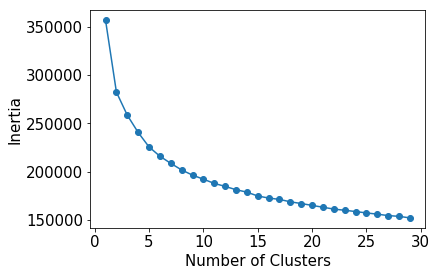

In [8]:
k_range=range(1,30)
inertias=[]
for k in k_range: 
    km=KMeans(n_clusters=k)
    km.fit(dim_red_array)
    inertia=km.inertia_
    inertias.append(inertia)

plt.plot(k_range,inertias,marker='o')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

Fitting the model and creating the labled table 

In [9]:
km_model=KMeans(n_clusters=8,random_state=42)
km_model.fit(dim_red_array)
km_pred=km_model.labels_

In [10]:
df_km=pd.DataFrame({'Title':df_dv['Title'],'Cluster_ID':km_pred})
df_km.head(30)

,Title,Cluster_ID
0,Accountants,3
1,Actors,7
2,Actuaries,3
3,Acupuncturists,6
4,Acute Care Nurses,6
5,Adapted Physical Education Specialists,1
6,Adhesive Bonding Machine Operators and Tenders,4
7,"Administrative Law Judges, Adjudicators, and H...",1
8,Administrative Services Managers,1
9,Adult Basic and Secondary Education and Litera...,1


3D visualization of the clusters 

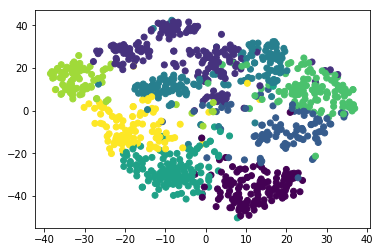

In [11]:
tsne=TSNE(learning_rate=100)
tsne_feat=tsne.fit_transform(dim_red_array)
xs = tsne_feat[:,0]
ys = tsne_feat[:,1]
plt.scatter(xs,ys,c=km_pred)

### Hierarchial Clustering 

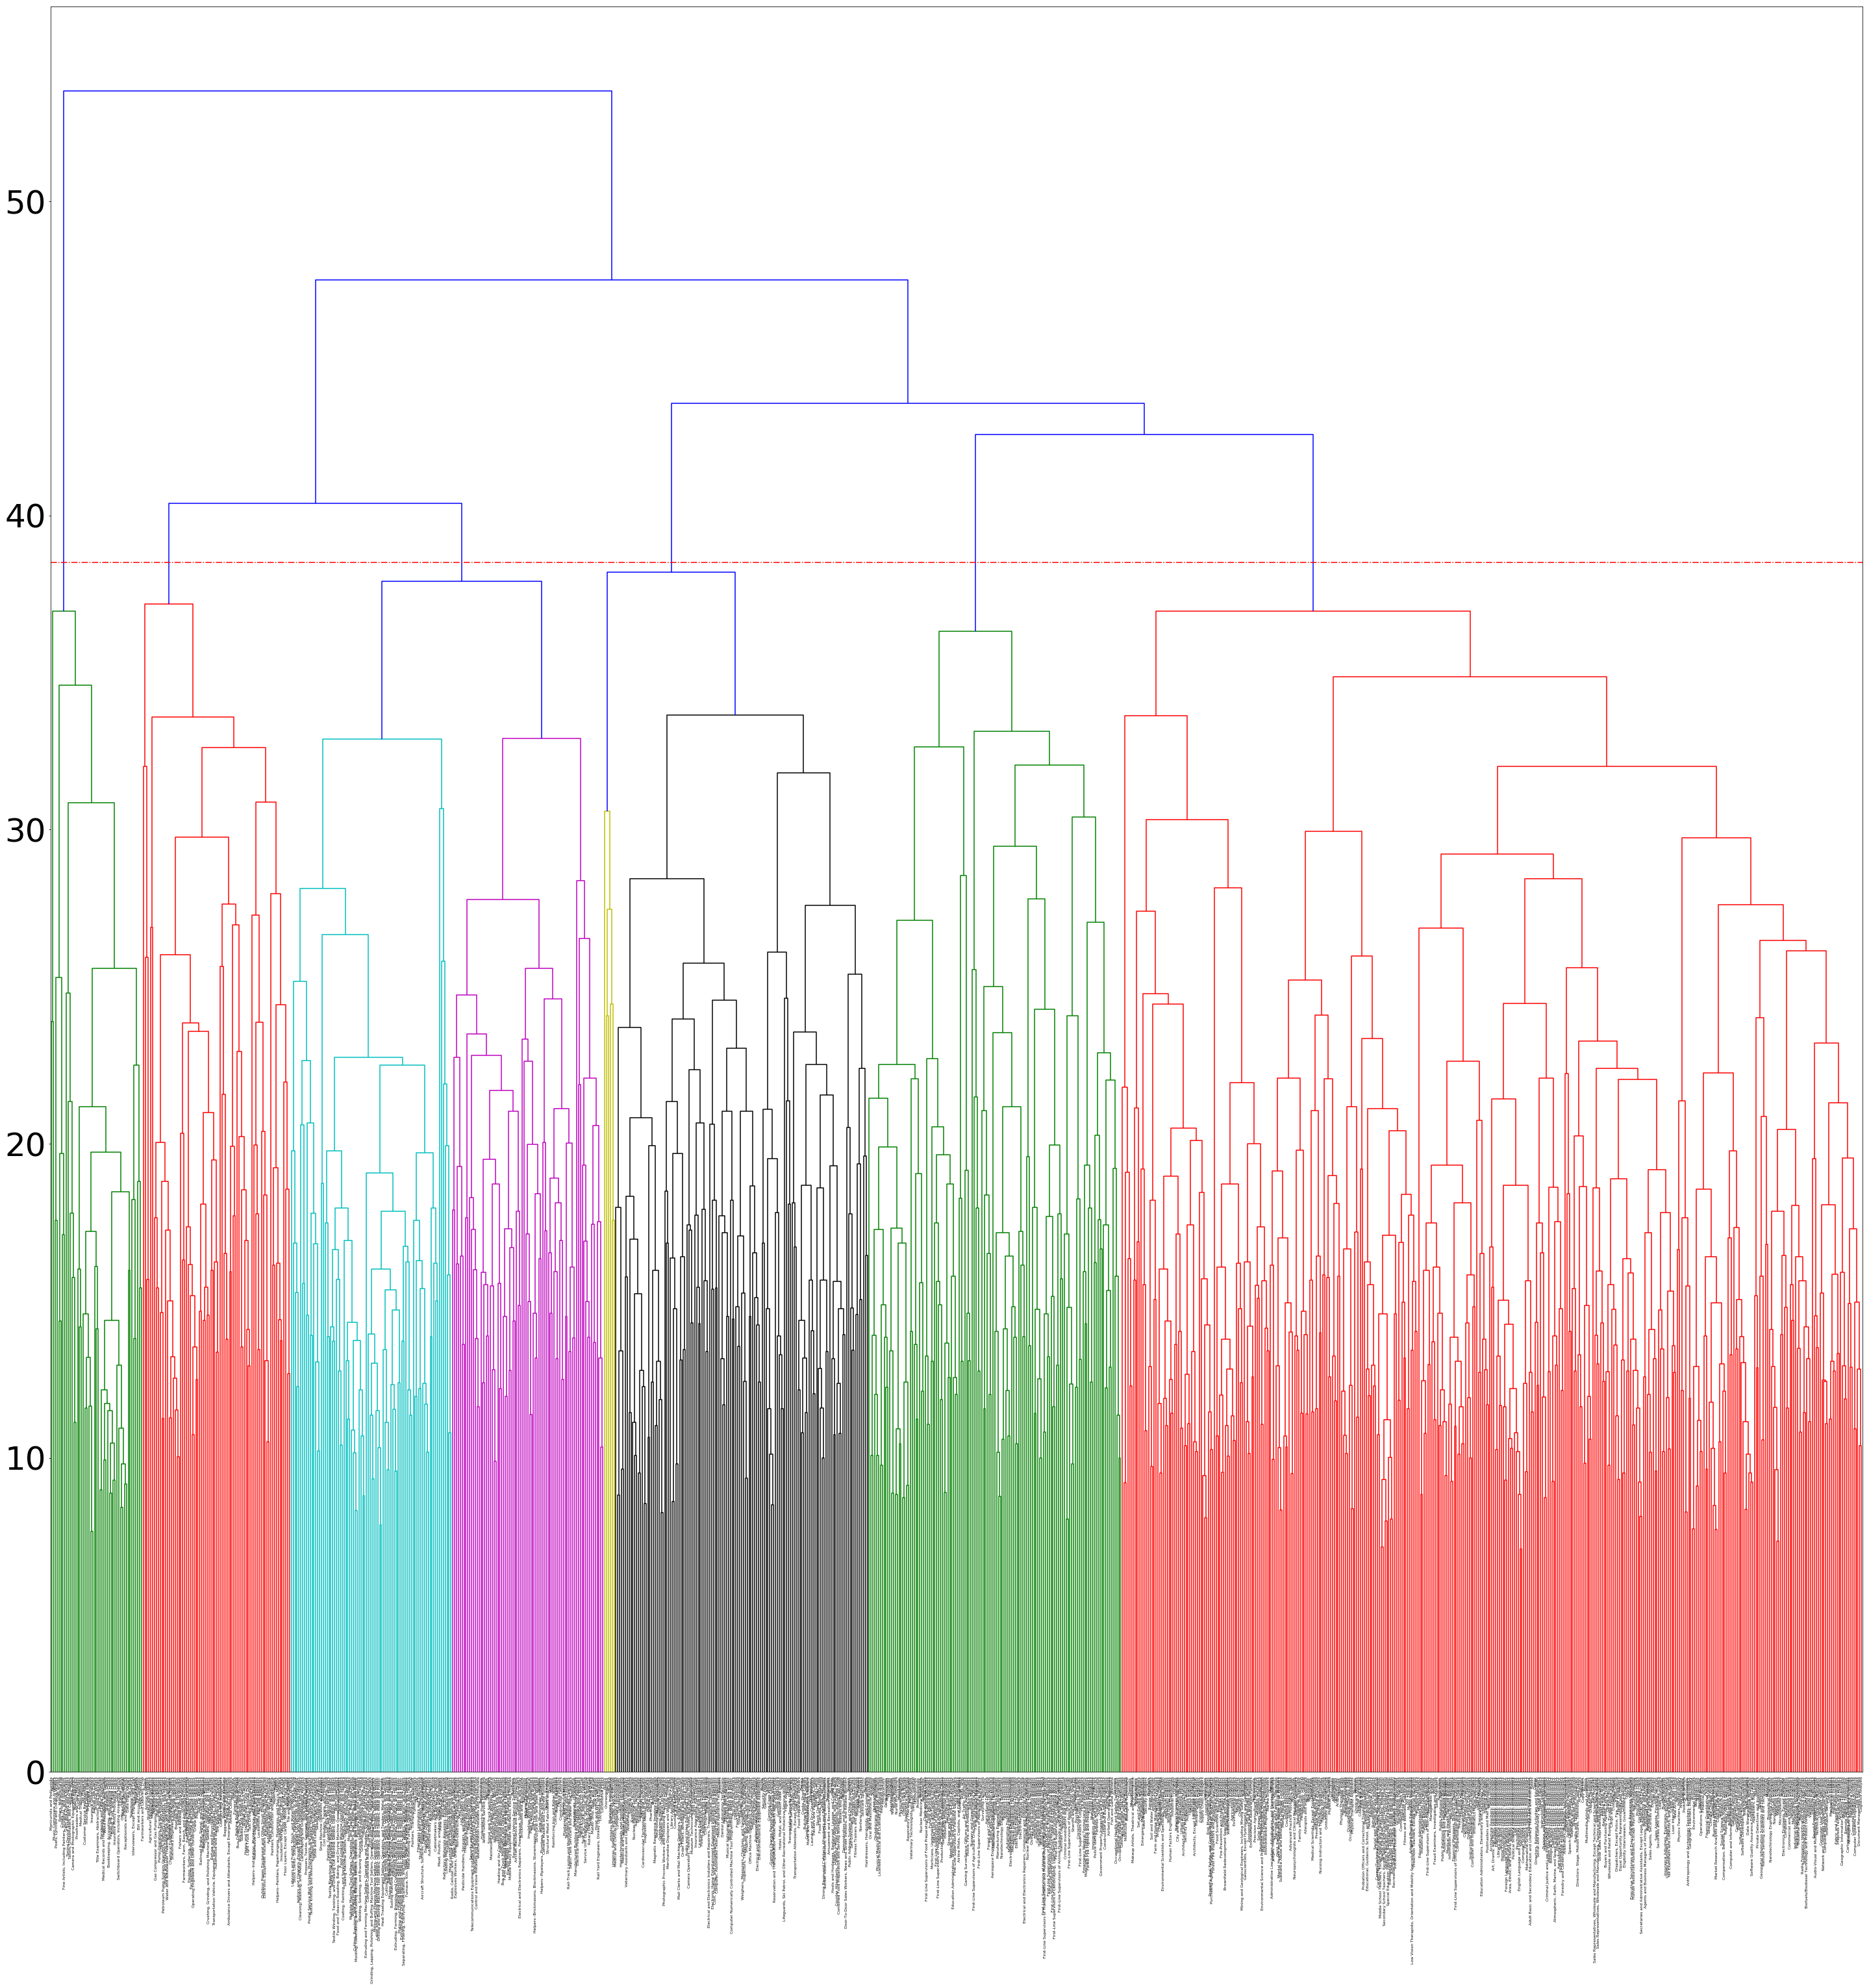

In [12]:
merge = linkage(dim_red_array,method='complete')
figure=plt.figure(figsize=(50,50)) 
dendrogram(merge,labels=list(df_dv['Title']),leaf_rotation=90,leaf_font_size=6)
plt.yticks(fontsize=50)
plt.axhline(38.5,color='red',linestyle='-.')
plt.show()

In [13]:
ag_model=AgglomerativeClustering(n_clusters=9)
ag_model.fit(dim_red_array)
ag_pred=ag_model.labels_
df_ag=pd.DataFrame({'Title':df_dv['Title'],'Cluster_ID':ag_pred})
df_ag.head(15)

,Title,Cluster_ID
0,Accountants,3
1,Actors,2
2,Actuaries,3
3,Acupuncturists,0
4,Acute Care Nurses,4
5,Adapted Physical Education Specialists,0
6,Adhesive Bonding Machine Operators and Tenders,5
7,"Administrative Law Judges, Adjudicators, and H...",6
8,Administrative Services Managers,0
9,Adult Basic and Secondary Education and Litera...,3


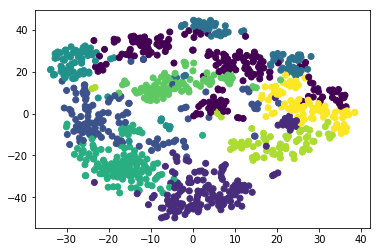

In [14]:
tsne=TSNE(learning_rate=70)
tsne_feat=tsne.fit_transform(dim_red_array)
xs = tsne_feat[:,0]
ys = tsne_feat[:,1]
plt.scatter(xs,ys,c=ag_pred)

### NMF 

In [15]:
max_abs=MaxAbsScaler()
max_array=max_abs.fit_transform(array)
n_components=5
model_nmf=NMF(n_components=n_components,random_state=42)
nmf_features=model_nmf.fit_transform(max_array)
comp=model_nmf.components_

In [16]:
nmf_comp_df=pd.DataFrame(data=comp,columns=df_dv.columns[1:],index=np.arange(0,n_components))
nmf_comp_df.index.name='Cluster_ID'
nmf_comp_df.head()

,Achievement/Effort_Importance,Active Learning_Importance,Active Listening_Importance,Adaptability/Flexibility_Importance,Administration and Management_Importance,Analytical Thinking_Importance,Analyzing Data or Information_Importance,Arm-Hand Steadiness_Importance,Artistic_Occupational Interests,Assisting and Caring for Others_Importance,...,Work Schedules_Context_3.0,Work With Work Group or Team_Context_1.0,Work With Work Group or Team_Context_2.0,Work With Work Group or Team_Context_3.0,Work With Work Group or Team_Context_4.0,Work With Work Group or Team_Context_5.0,Wrist-Finger Speed_Importance,Writing_Importance,Written Comprehension_Importance,Written Expression_Importance
Cluster_ID,,,,,,,,,,,,,,,,,,,,,
0,0.755620,0.831280,0.698655,0.709892,0.584313,0.896086,0.898344,0.421726,0.466671,0.271341,...,0.000000,0.000000,0.076180,0.215011,0.558939,0.246428,0.397582,0.746728,0.798317,0.806160
1,0.636289,0.605275,0.609334,0.695935,0.642987,0.601916,0.497023,0.655558,0.033631,0.558910,...,0.086144,0.007931,0.019248,0.114515,0.202347,0.588671,0.540979,0.477862,0.540209,0.537559
2,1.038740,0.995643,1.018068,1.036687,0.858601,0.983576,0.919163,0.215523,0.496825,0.550951,...,0.052864,0.097292,0.161235,0.235216,0.359981,0.650331,0.349104,0.929220,1.017112,1.026370
3,0.555956,0.582788,0.577641,0.620982,0.431942,0.525870,0.461648,0.416508,0.224085,0.781985,...,0.007397,0.000000,0.000000,0.001044,0.119661,0.550173,0.289774,0.499085,0.530911,0.544347
4,0.561760,0.373619,0.403518,0.562735,0.299056,0.466827,0.359450,0.881098,0.193560,0.317460,...,0.066987,0.147704,0.270861,0.390605,0.268316,0.193055,0.732185,0.271159,0.365693,0.302481


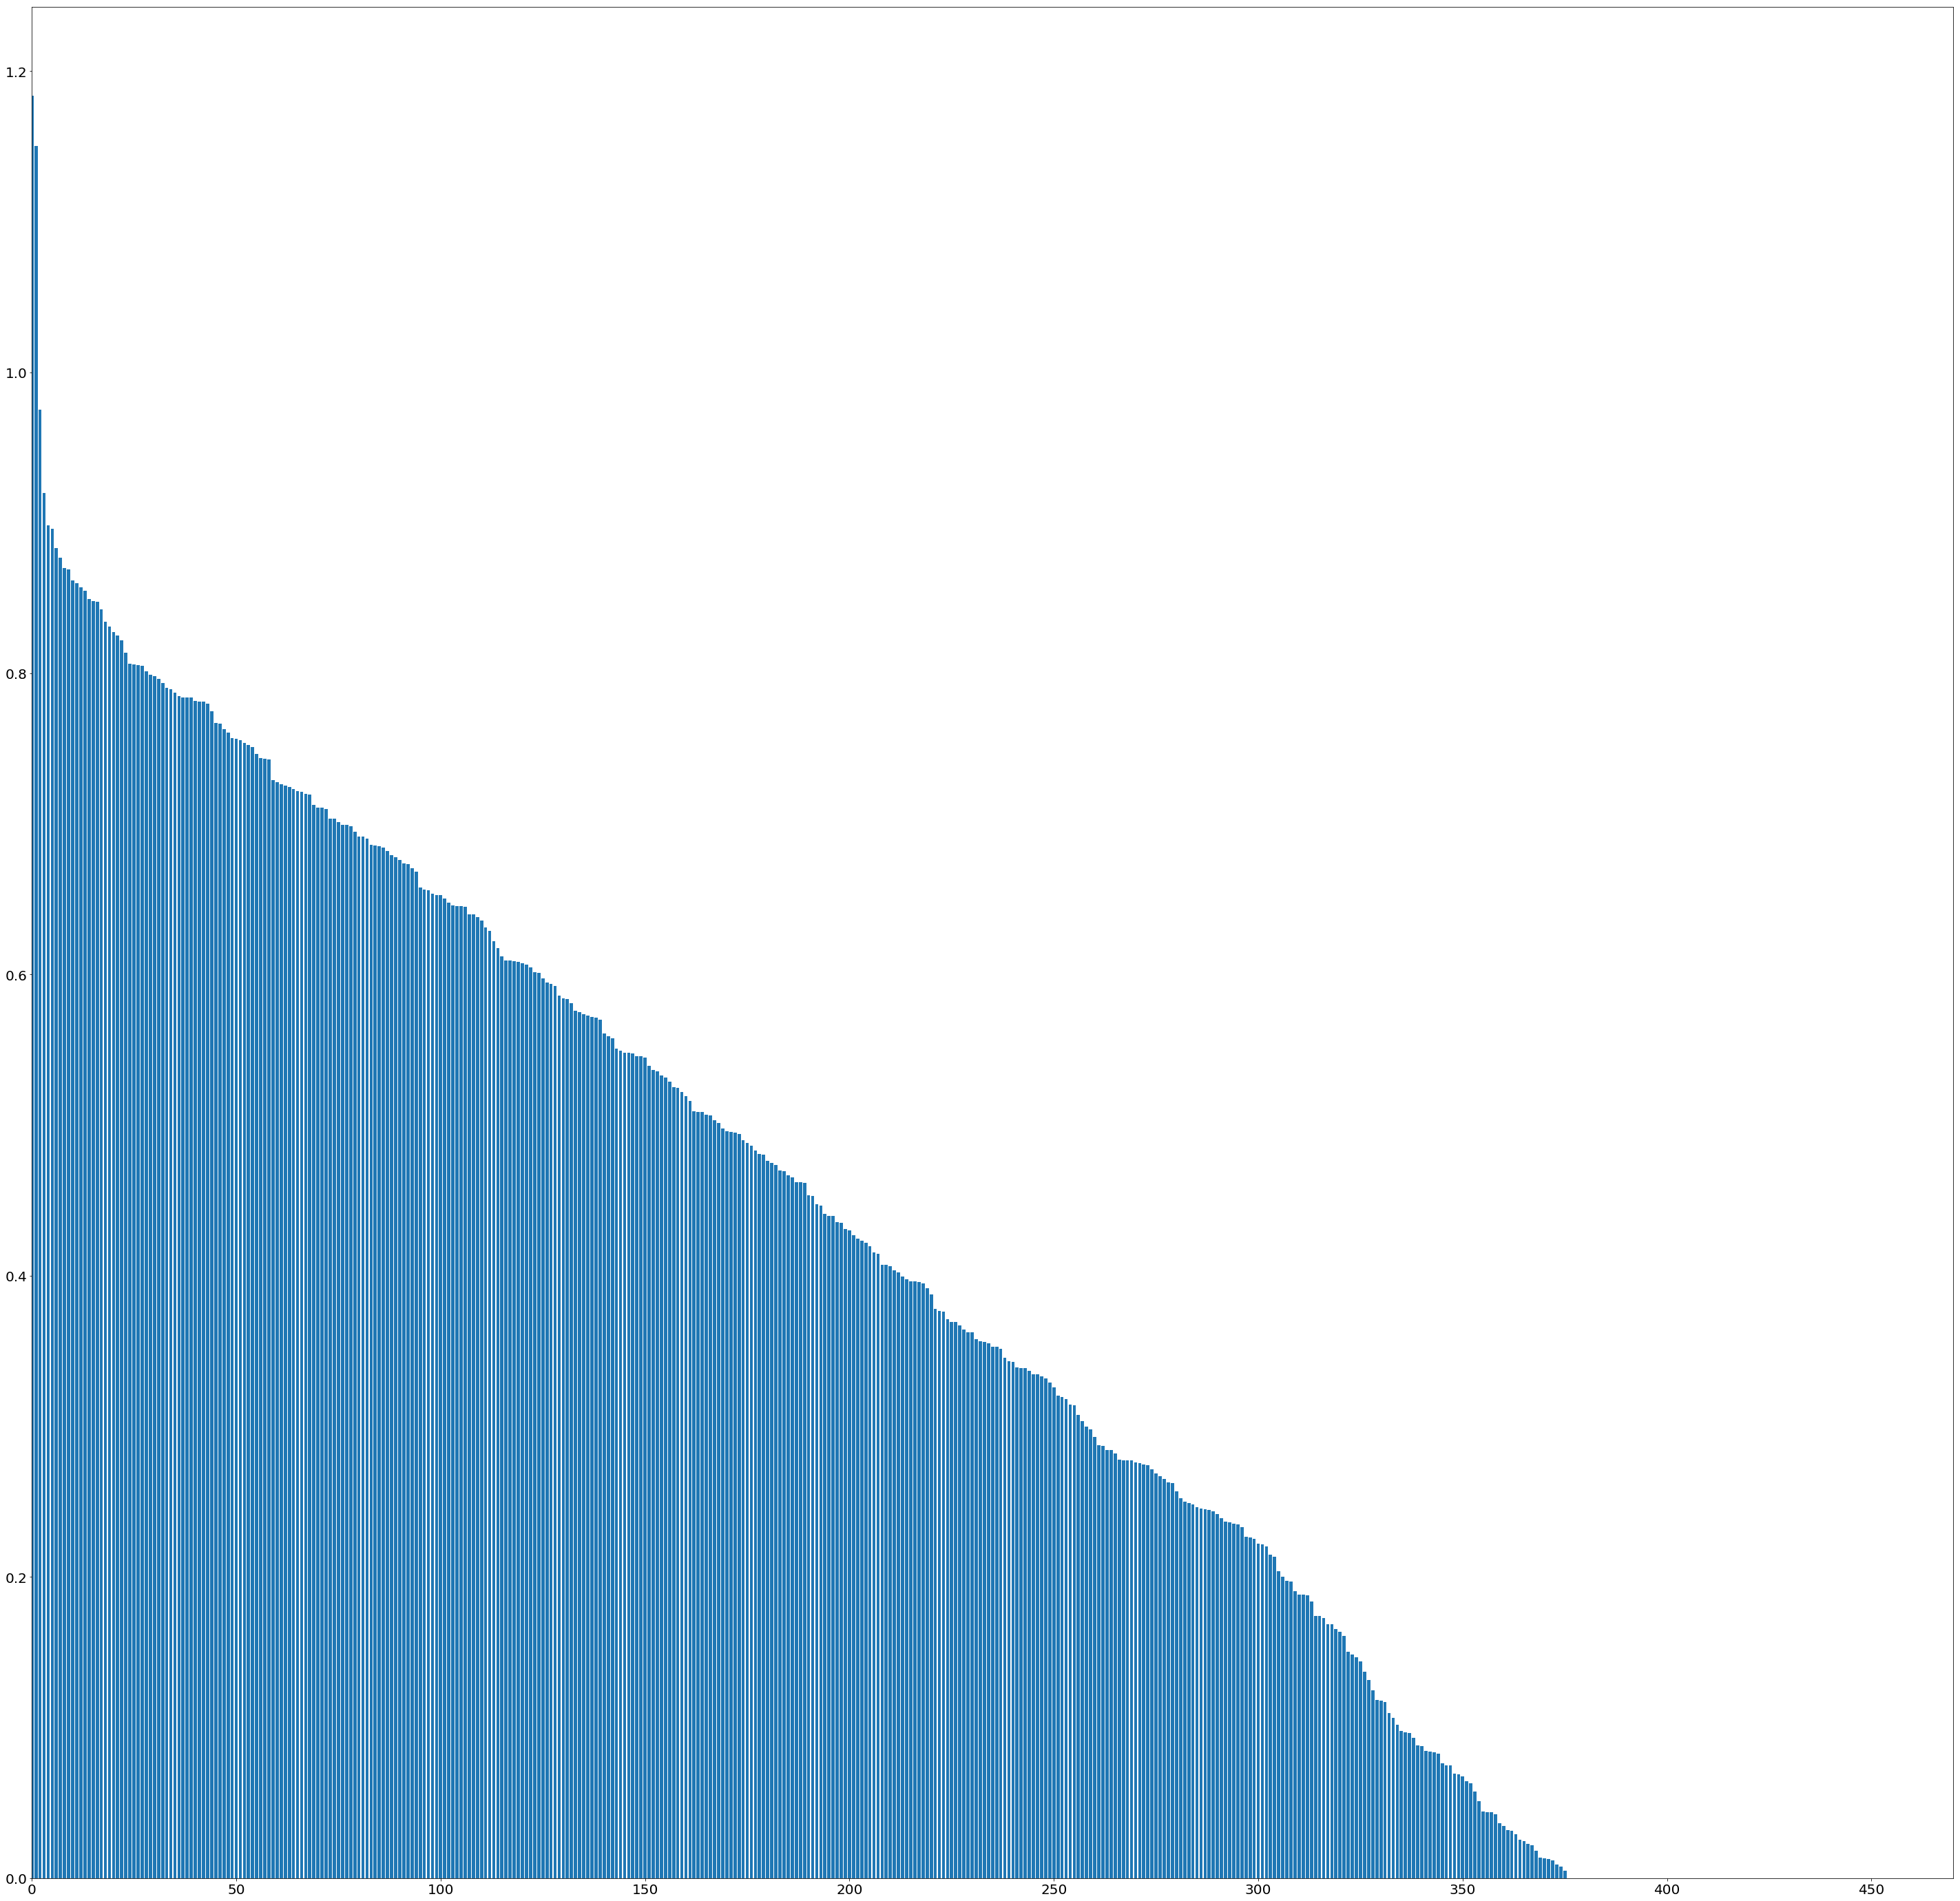

In [17]:
plt.figure(figsize=(50,50))
plt.xlim(0,470)
plt.bar(np.arange(0,466),nmf_comp_df.loc[0,:].sort_values(ascending=False))
plt.xticks(np.arange(0,470,50),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

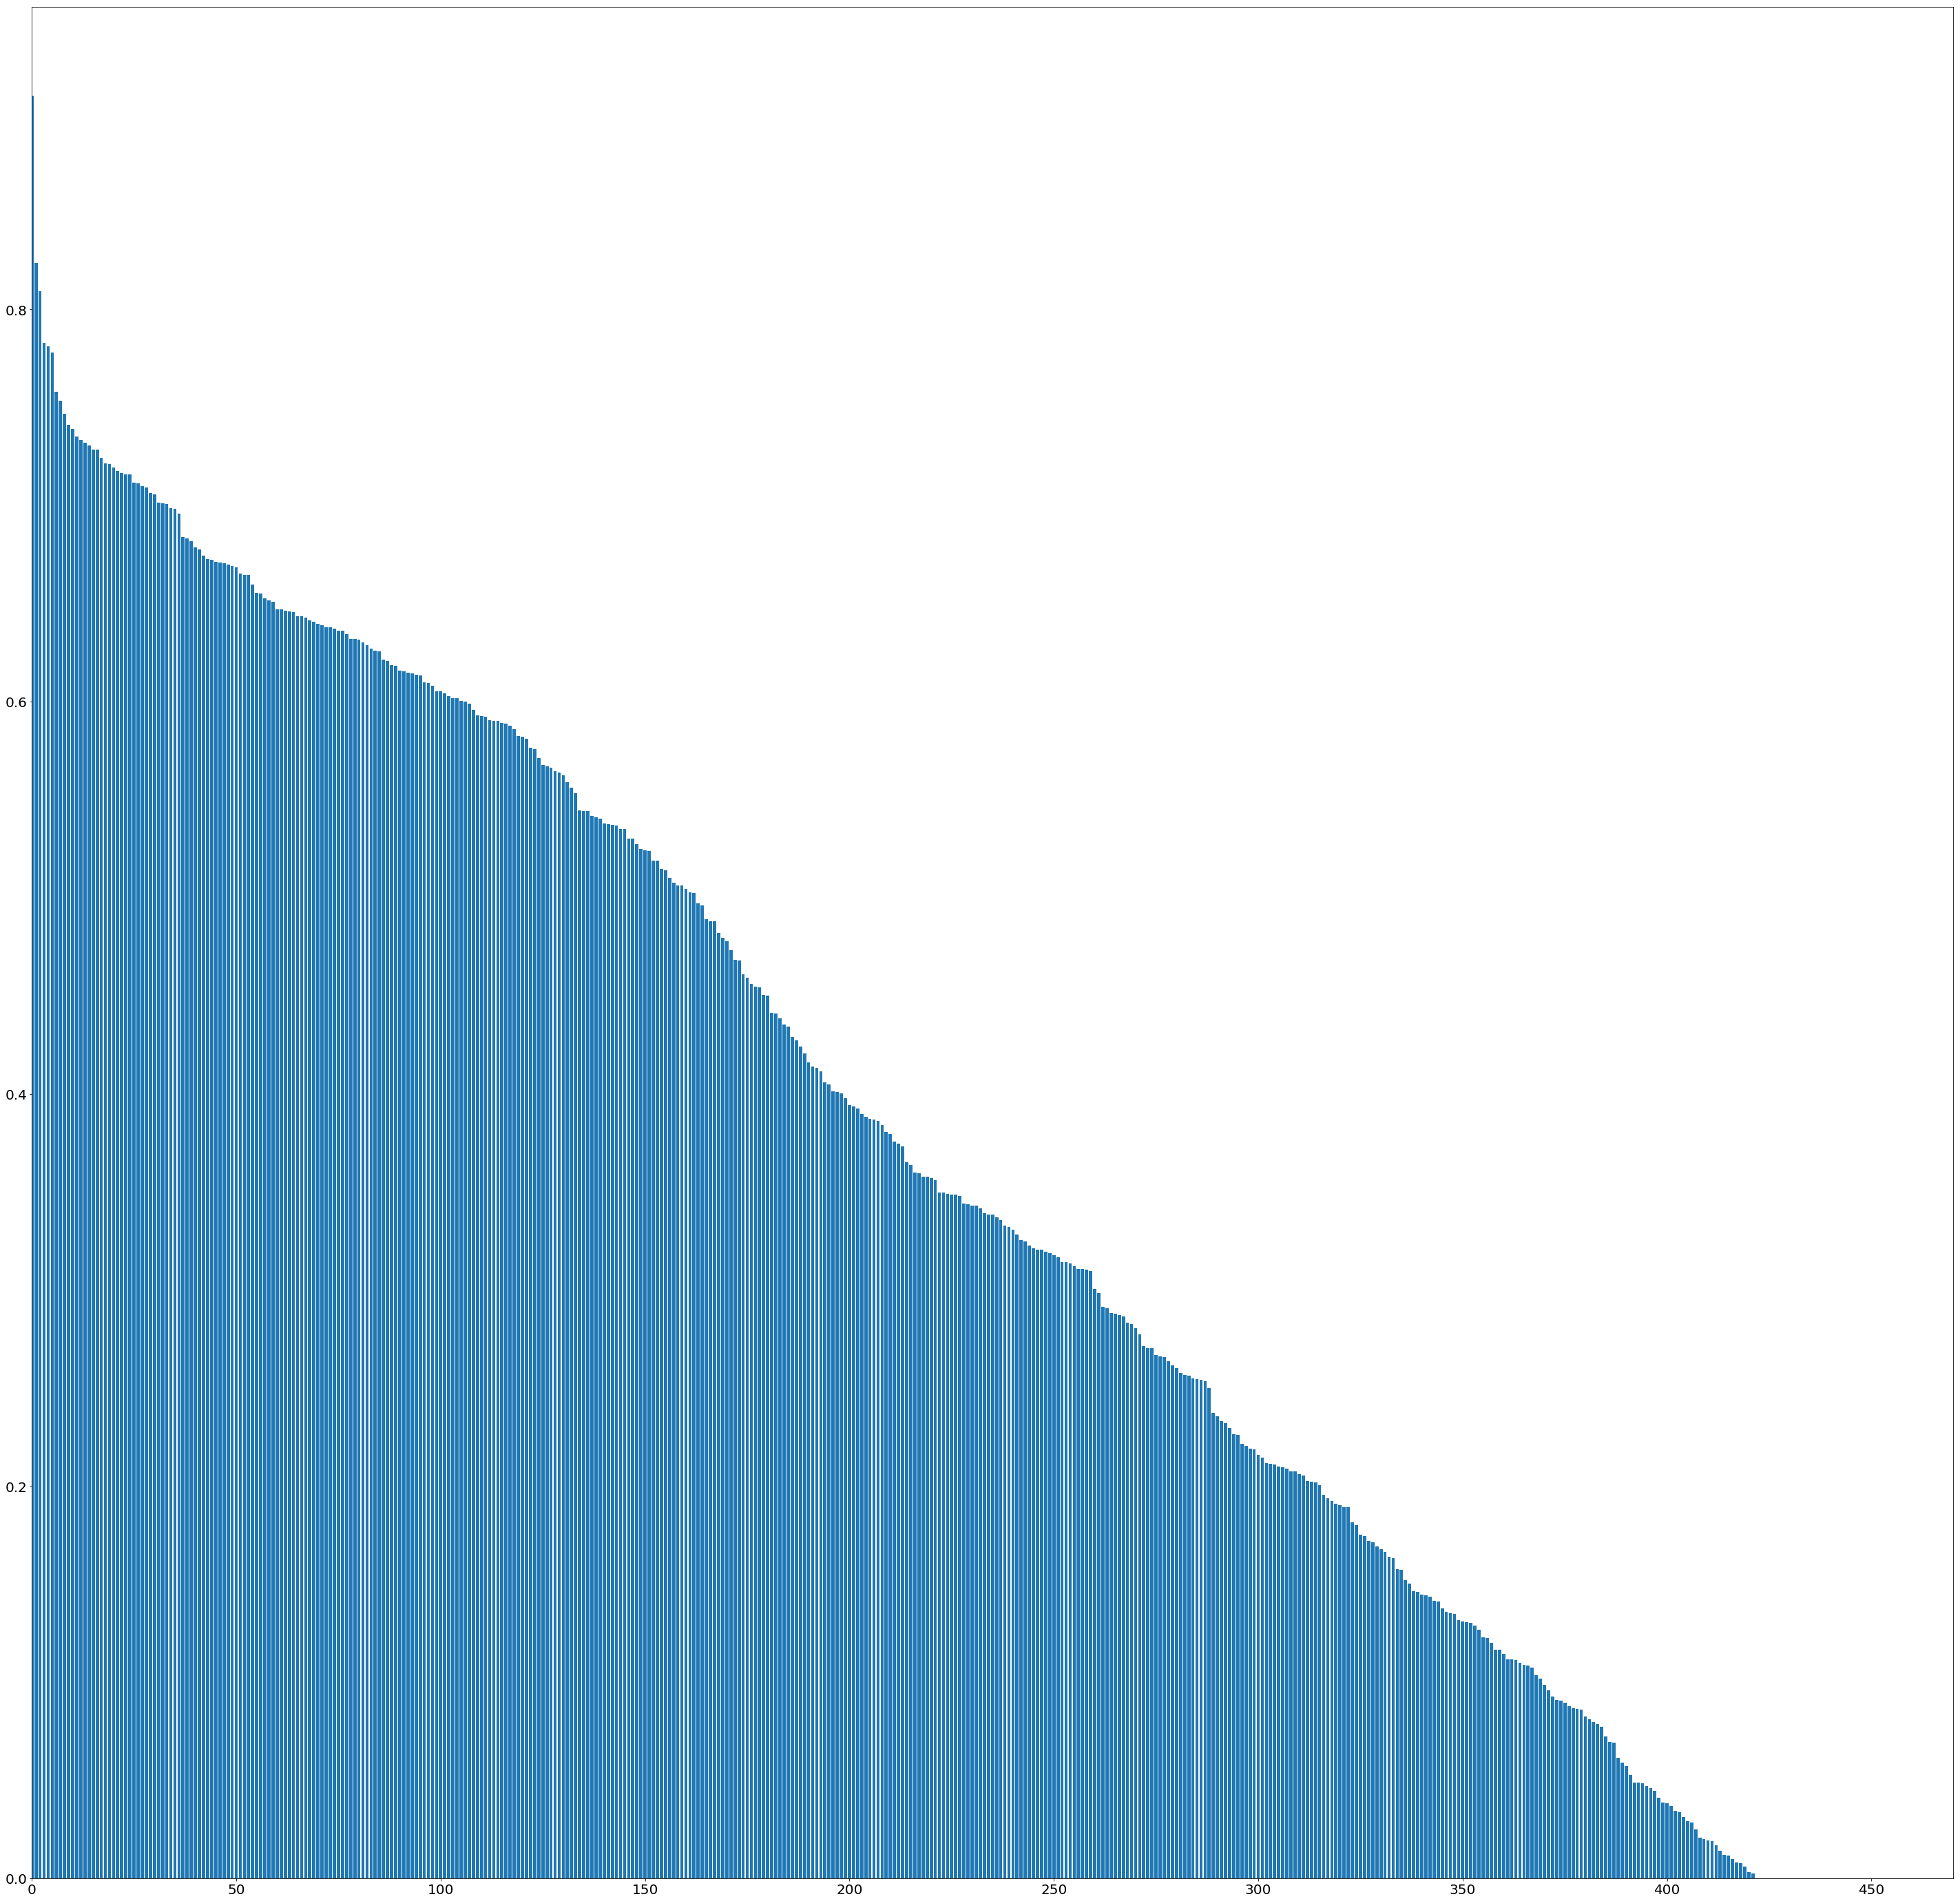

In [18]:
plt.figure(figsize=(50,50))
plt.xlim(0,470)
plt.bar(np.arange(0,466),nmf_comp_df.loc[1,:].sort_values(ascending=False))
plt.xticks(np.arange(0,470,50),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

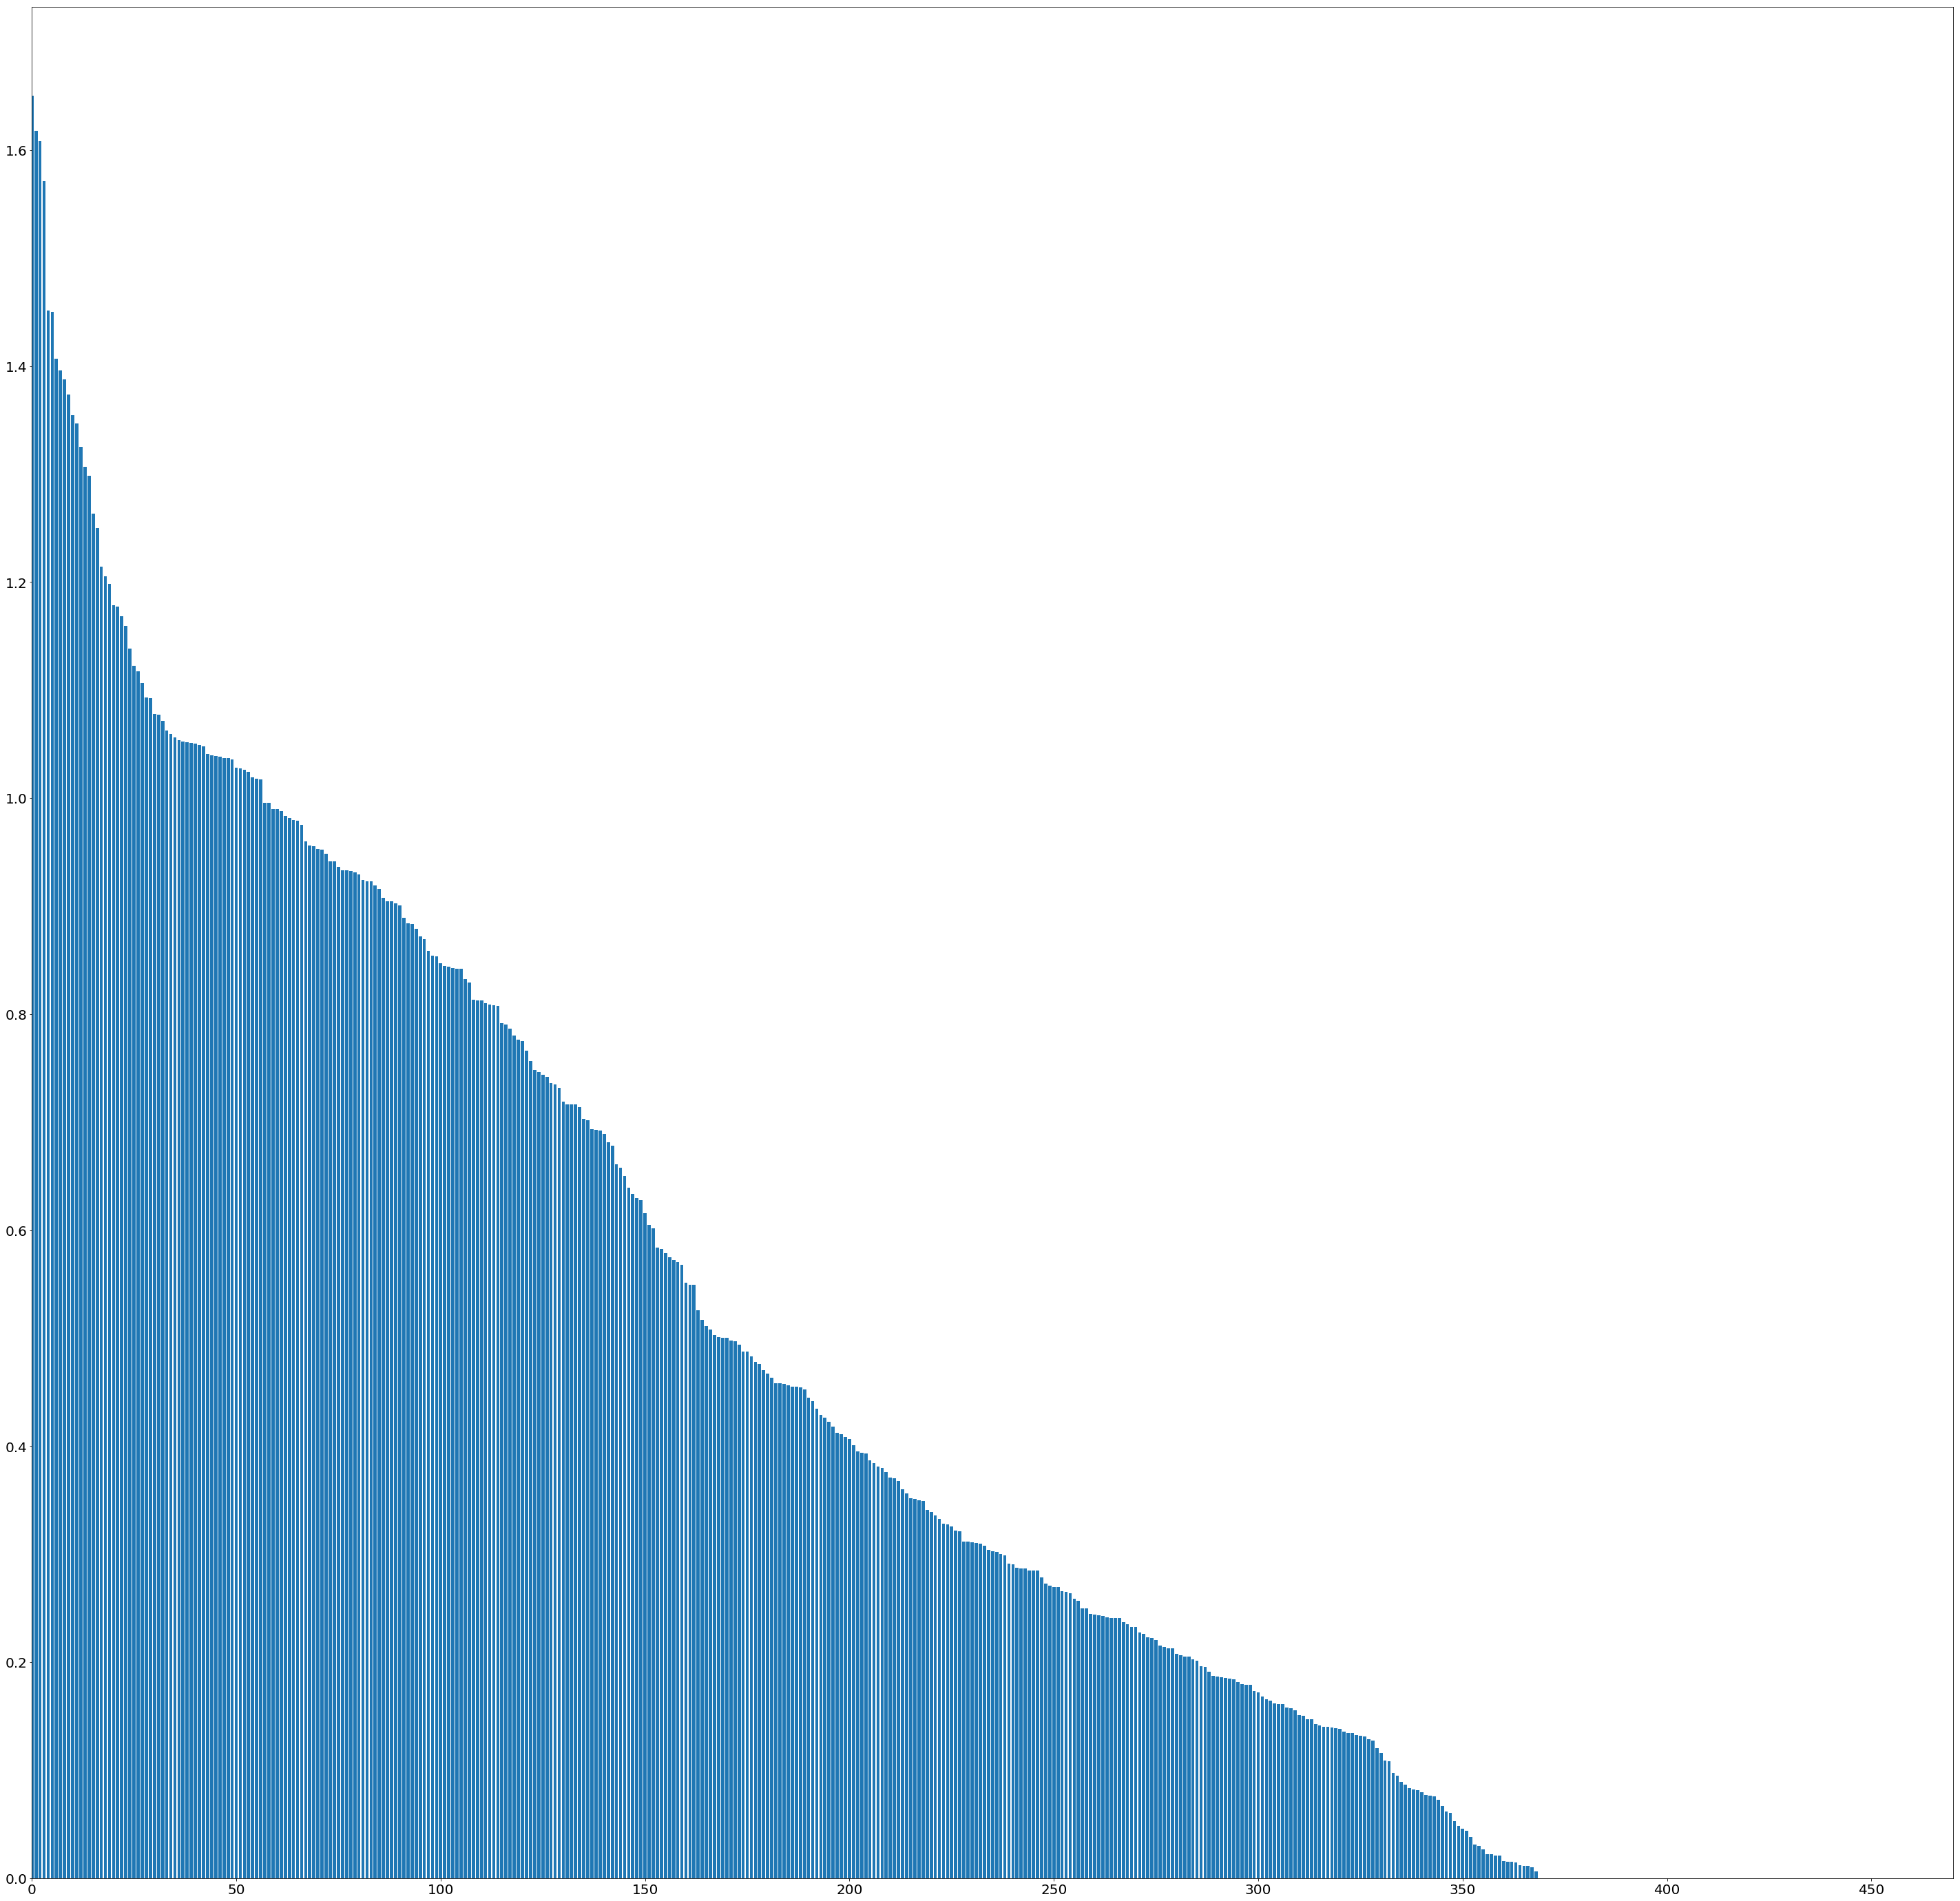

In [19]:
plt.figure(figsize=(50,50))
plt.xlim(0,470)
plt.bar(np.arange(0,466),nmf_comp_df.loc[2,:].sort_values(ascending=False))
plt.xticks(np.arange(0,470,50),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

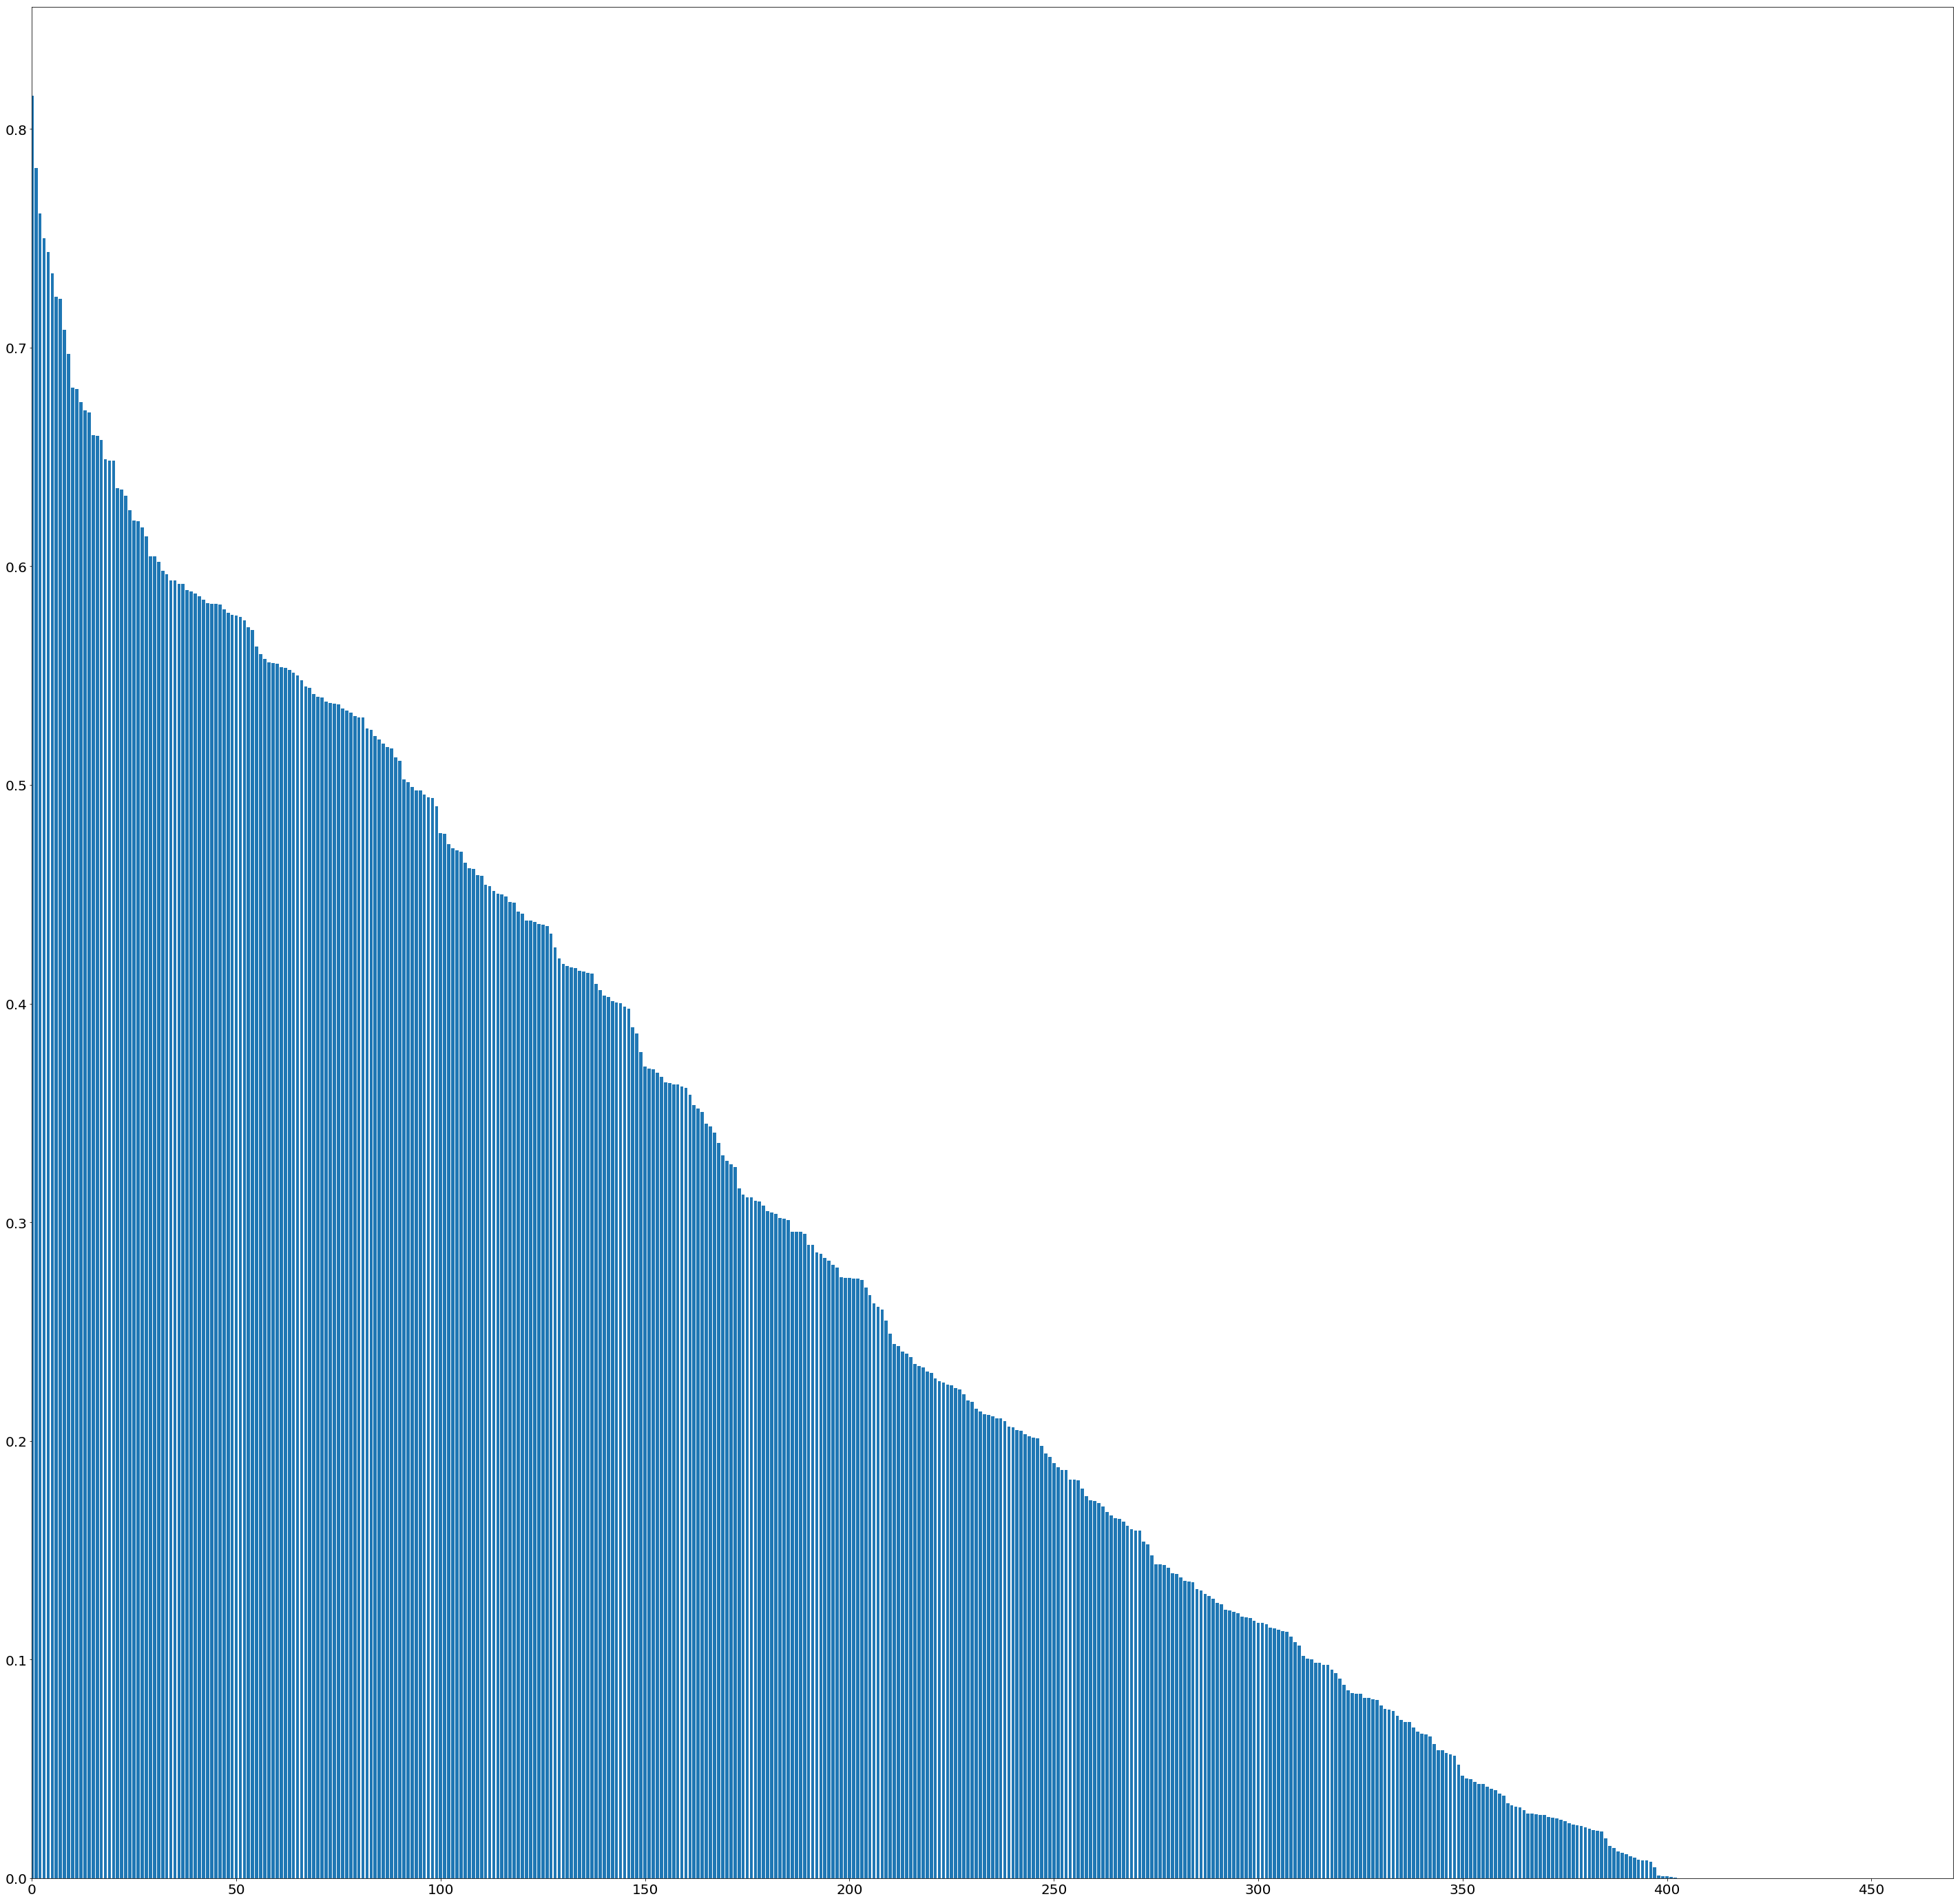

In [20]:
plt.figure(figsize=(50,50))
plt.xlim(0,470)
plt.bar(np.arange(0,466),nmf_comp_df.loc[3,:].sort_values(ascending=False))
plt.xticks(np.arange(0,470,50),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

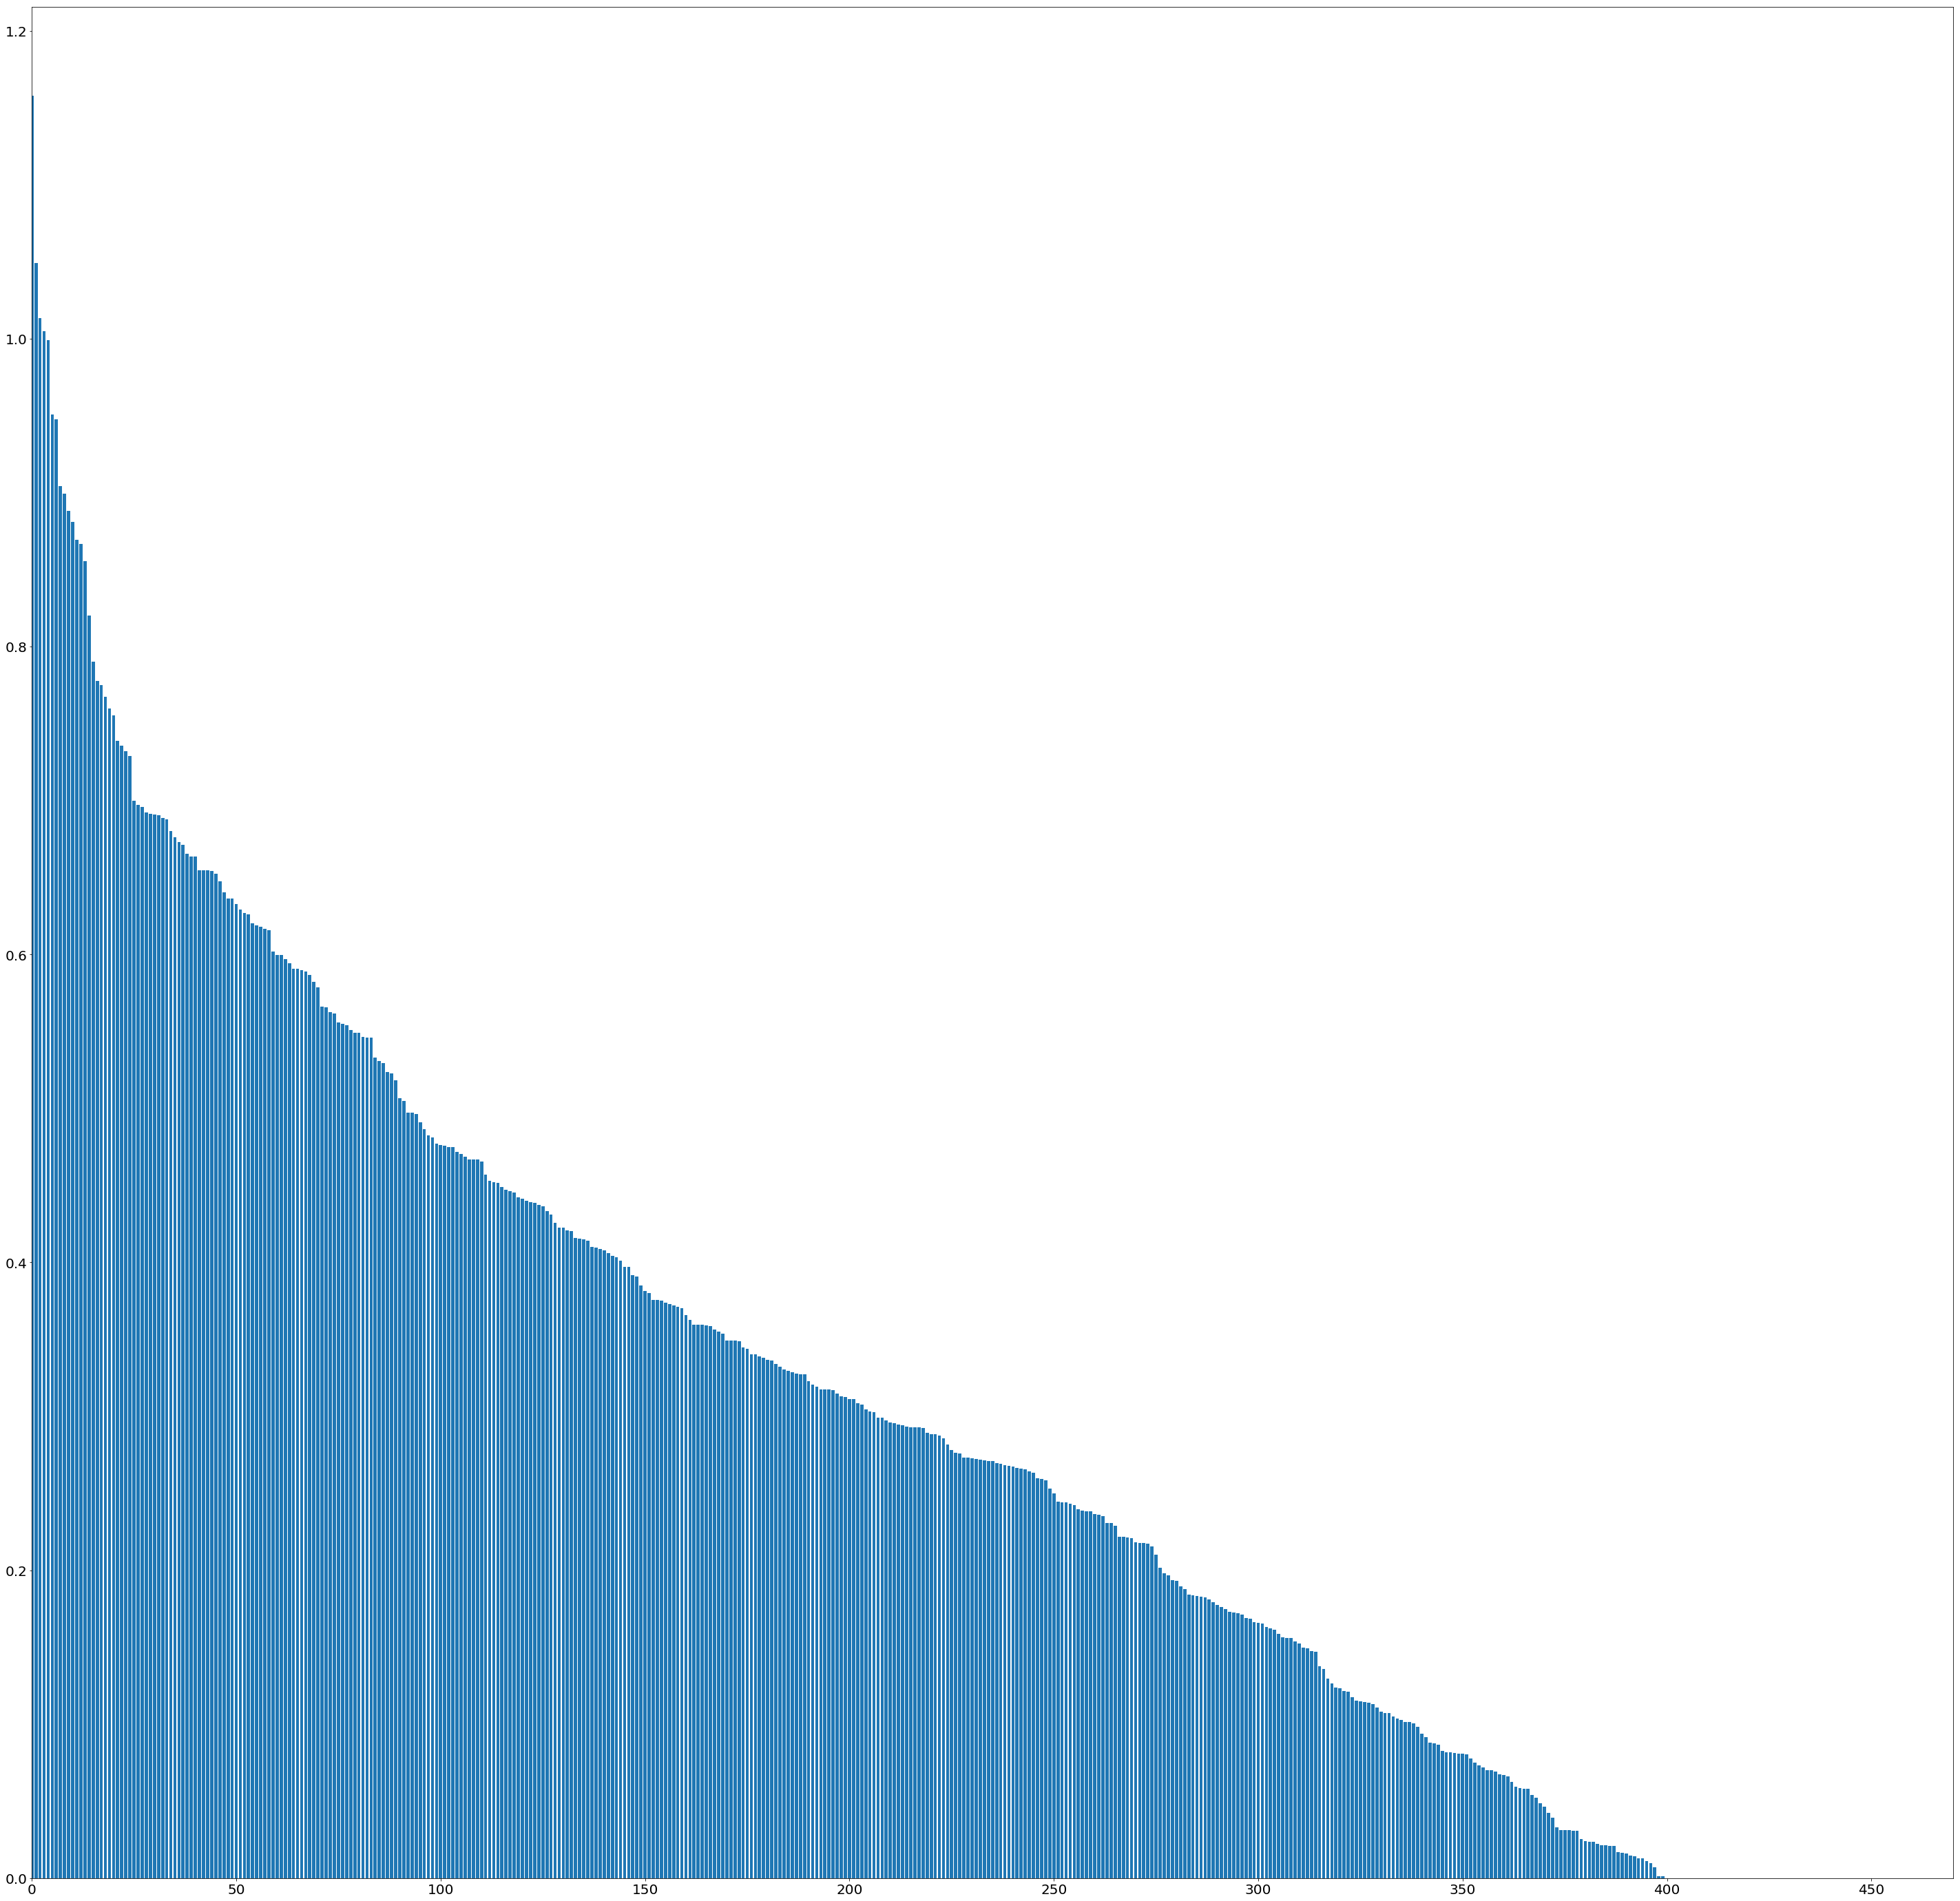

In [21]:
plt.figure(figsize=(50,50))
plt.xlim(0,470)
plt.bar(np.arange(0,466),nmf_comp_df.loc[4,:].sort_values(ascending=False))
plt.xticks(np.arange(0,470,50),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [22]:
nmf_feat_df=pd.DataFrame(data=nmf_features,columns=np.arange(0,n_components), index=df_dv['Title'])
nmf_feat_df_T=nmf_feat_df.T
nmf_feat_df_T.head()
cluster_ids=[]

for column in nmf_feat_df_T.columns: 
    max_value=nmf_feat_df_T[column].max()
    cluster_id=nmf_feat_df_T.index[nmf_feat_df_T[column]==max_value].tolist()[0]
    cluster_ids.append(cluster_id)

In [23]:
cluster_array=np.asarray(cluster_ids)
nmf_feat_df['Cluster_ID']=cluster_array
nmf_feat_df.head(30)

,0,1,2,3,4,Cluster_ID
Title,,,,,,
Accountants,0.107411,0.000000,0.628185,0.047151,0.116042,2
Actors,0.152413,0.189158,0.250783,0.298015,0.105343,3
Actuaries,0.241536,0.000000,0.610415,0.000000,0.070427,2
Acupuncturists,0.120640,0.000000,0.140834,0.821481,0.169637,3
Acute Care Nurses,0.050215,0.102125,0.000000,1.251181,0.060303,3
Adapted Physical Education Specialists,0.234600,0.158939,0.059147,0.754290,0.098562,3
Adhesive Bonding Machine Operators and Tenders,0.025054,0.352916,0.000000,0.253159,0.619924,4
"Administrative Law Judges, Adjudicators, and Hearing Officers",0.078545,0.038604,0.448690,0.497904,0.000000,3
Administrative Services Managers,0.234613,0.253806,0.347303,0.251353,0.009137,2


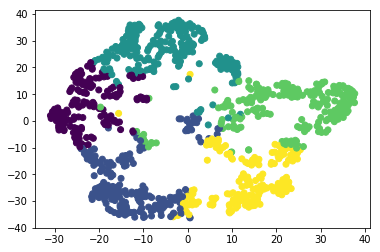

In [24]:
tsne=TSNE(learning_rate=170)
tsne_feat=tsne.fit_transform(nmf_features)
xs = tsne_feat[:,0]
ys = tsne_feat[:,1]
plt.scatter(xs,ys,c=cluster_array)

### Another NMF

In [25]:
variables=nmf_comp_df.loc[0,:].sort_values(ascending=False)[:30].index.tolist()
variables.extend(nmf_comp_df.loc[1,:].sort_values(ascending=False)[:30].index.tolist())
variables.extend(nmf_comp_df.loc[2,:].sort_values(ascending=False)[:30].index.tolist())
variables.extend(nmf_comp_df.loc[3,:].sort_values(ascending=False)[:30].index.tolist())
variables.extend(nmf_comp_df.loc[4,:].sort_values(ascending=False)[:30].index.tolist())
common_variables=[]
imp_feat=[common_variables.append(variable) for variable in variables if variable not in common_variables ]
common_variables.append('Title')

In [26]:
print(len(variables))
print(len(common_variables))

150
108


In [27]:
new_df_dv=df_dv.loc[:,variables]
new_array=new_df_dv.drop(columns='Title').values

KeyError: "['Title'] not found in axis"

In [ ]:
new_array.shape

In [ ]:
max_abs=MaxAbsScaler()
max_array=max_abs.fit_transform(new_array)
n_components=6
model_nmf=NMF(n_components=n_components,random_state=42)
nmf_features=model_nmf.fit_transform(max_array)
comp=model_nmf.components_

In [ ]:
nmf_comp_df=pd.DataFrame(data=comp,columns=new_df_dv.columns[:-1],index=np.arange(0,n_components))
nmf_comp_df.index.name='Cluster_ID'
nmf_comp_df.head()

In [ ]:
nmf_feat_df=pd.DataFrame(data=nmf_features,columns=np.arange(0,n_components), index=new_df_dv['Title'])
nmf_feat_df_T=nmf_feat_df.T
nmf_feat_df_T.head()
cluster_ids=[]

for column in nmf_feat_df_T.columns: 
    max_value=nmf_feat_df_T[column].max()
    cluster_id=nmf_feat_df_T.index[nmf_feat_df_T[column]==max_value].tolist()[0]
    cluster_ids.append(cluster_id)

In [ ]:
cluster_array=np.asarray(cluster_ids)
nmf_feat_df['Cluster_ID']=cluster_array
nmf_feat_df.head(30)

In [ ]:
tsne=TSNE(learning_rate=170)
tsne_feat=tsne.fit_transform(nmf_features)
xs = tsne_feat[:,0]
ys = tsne_feat[:,1]
plt.scatter(xs,ys,c=cluster_array)